In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv('./bot1.txt')
df['profit'] = df['balance'] + df['position'] * df['price']
print(df.head())

   position   balance     price  profit
0         1 -228.3000  228.3000  0.0000
1         0   -0.0712  228.2288 -0.0712
2        -1  228.1576  228.2288 -0.0712
3         0   -0.0269  228.1845 -0.0269
4         1 -228.2114  228.1845 -0.0269


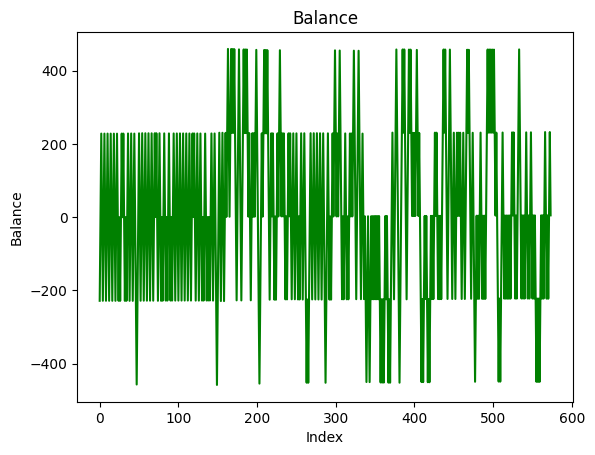

In [141]:
df['balance'].plot(title='Balance', xlabel='Index', ylabel='Balance', color='g')
plt.show()

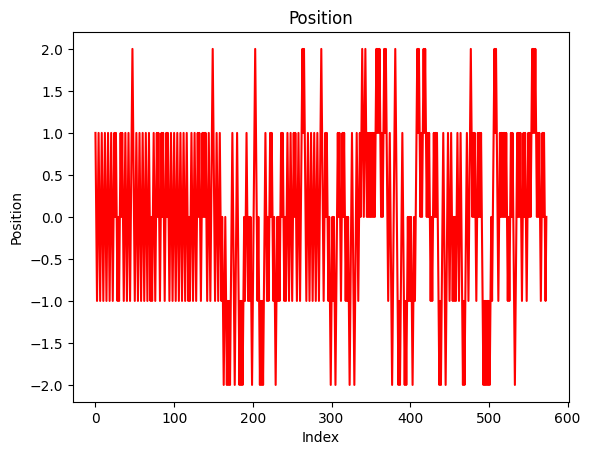

In [142]:
df['position'].plot(title='Position', xlabel='Index', ylabel='Position', color='r')
plt.show()

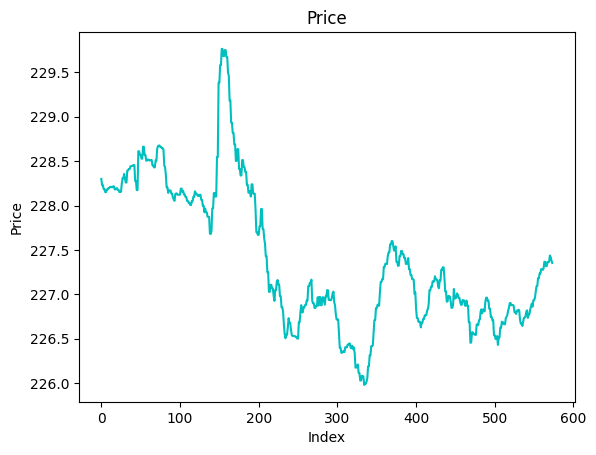

In [143]:
df['price'].plot(title='Price', xlabel='Index', ylabel='Price', color='c')
plt.show()

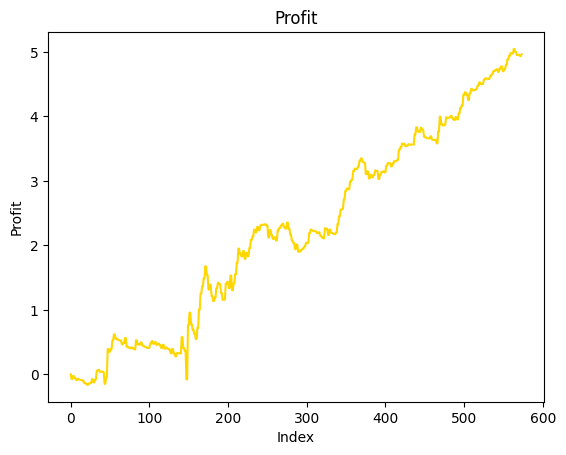

In [144]:
df['profit'].plot(title='Profit', xlabel='Index', ylabel='Profit', color='gold')
plt.show()

In [145]:
number_of_trades = len(df)
number_of_pairs = int(number_of_trades / 2)
profits = (df.iloc[1::2].reset_index(drop=True)['profit'] - df.iloc[0::2].reset_index(drop=True)['profit']).to_numpy()

print('Total profit is', np.sum(profits))
print('Average profit per trade is', np.mean(profits))
print('Standard deviation of profits per trade is', np.std(profits))
print('Percentage of good trades is', 100 * np.sum(profits > 0) / number_of_pairs)
print('Average profit per good trade is', np.mean(profits[profits > 0]))
print('Average loss per bad trade is', -np.mean(profits[profits < 0]))

Total profit is 5.195399999998842
Average profit per trade is 0.01810243902438621
Standard deviation of profits per trade is 0.10250119109179226
Percentage of good trades is 52.613240418118465
Average profit per good trade is 0.08109139072847474
Average loss per bad trade is 0.05221777777778404


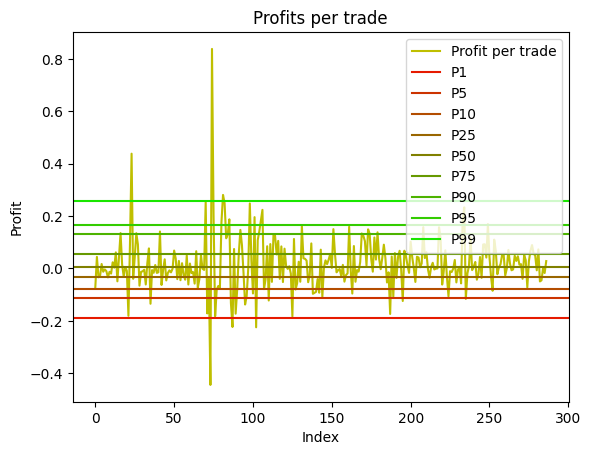

In [146]:
p1 = np.percentile(profits, 1)
p5 = np.percentile(profits, 5)
p10 = np.percentile(profits, 10)
p25 = np.percentile(profits, 25)
p50 = np.percentile(profits, 50)
p75 = np.percentile(profits, 75)
p90 = np.percentile(profits, 90)
p95 = np.percentile(profits, 95)
p99 = np.percentile(profits, 99)

plt.plot(range(number_of_pairs), profits, label='Profit per trade', color='y')
plt.axhline(y = p1, color = (0.9, 0.1, 0), label='P1')
plt.axhline(y = p5, color = (0.8, 0.2, 0), label='P5')
plt.axhline(y = p10, color = (0.7, 0.3, 0), label='P10')
plt.axhline(y = p25, color = (0.6, 0.4, 0), label='P25')
plt.axhline(y = p50, color = (0.5, 0.5, 0), label='P50')
plt.axhline(y = p75, color = (0.4, 0.6, 0), label='P75')
plt.axhline(y = p90, color = (0.3, 0.7, 0), label='P90')
plt.axhline(y = p95, color = (0.2, 0.8, 0), label='P95')
plt.axhline(y = p99, color = (0.1, 0.9, 0), label='P99')
plt.title('Profits per trade')
plt.xlabel('Index')
plt.ylabel('Profit')
plt.legend()
plt.show()

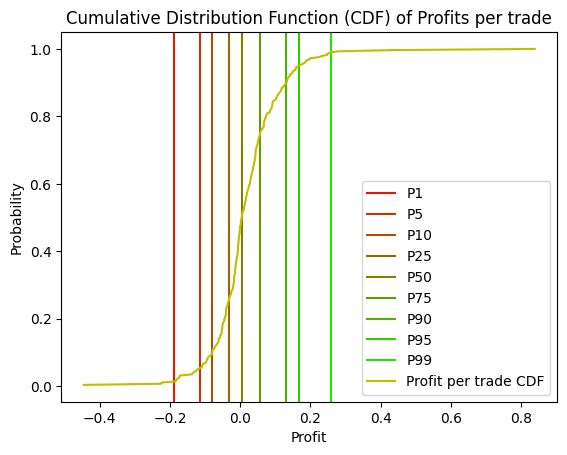

In [147]:
sorted_profits = np.sort(profits)
probabilities = np.arange(1, len(sorted_profits) + 1) / len(sorted_profits)

plt.axvline(x = p1, color = (0.9, 0.1, 0), label='P1')
plt.axvline(x = p5, color = (0.8, 0.2, 0), label='P5')
plt.axvline(x = p10, color = (0.7, 0.3, 0), label='P10')
plt.axvline(x = p25, color = (0.6, 0.4, 0), label='P25')
plt.axvline(x = p50, color = (0.5, 0.5, 0), label='P50')
plt.axvline(x = p75, color = (0.4, 0.6, 0), label='P75')
plt.axvline(x = p90, color = (0.3, 0.7, 0), label='P90')
plt.axvline(x = p95, color = (0.2, 0.8, 0), label='P95')
plt.axvline(x = p99, color = (0.1, 0.9, 0), label='P99')

plt.plot(sorted_profits, probabilities, label='Profit per trade CDF', color='y')
plt.title('Cumulative Distribution Function (CDF) of Profits per trade')
plt.xlabel('Profit')
plt.ylabel('Probability')
plt.legend()
plt.show()